# 【主成分分析を利用し、ワインデータの分類精度の貢献する】

ワインデータ の中から、色とプロリン（proline）の2つだけを使って

ロジスティック回帰モデルを作り、

n_components=2で主成分分析して分類精度の貢献する

In [32]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


# 【問題1 データセットの作成】

色（color_intensity）とプロリン（proline）の２つを用いる


In [6]:
X = data[["color_intensity", "proline"]]
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# 【問題2 データセットの分割】

test_size = 0.2としてください。


In [8]:
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine.data, y,  test_size = 0.2, random_state=5)

In [9]:
x_train.shape

(142, 13)

In [10]:
x_test.shape

(36, 13)

# 【問題3 標準化の実施】

X_train_std とX_test_stdを定義

In [11]:
sc = StandardScaler()
X_train_std = sc.fit_transform(x_train)
X_test_std = sc.fit_transform(x_test)

In [14]:
print("平均", X_train_std.mean())
print("標準偏差", X_train_std.std())

平均 1.170124548597348e-15
標準偏差 1.0


In [15]:
print("平均", X_test_std.mean())
print("標準偏差", X_test_std.std())

平均 -2.581031305111475e-16
標準偏差 1.0


# 【問題4 ロジスティック回帰にてfitの実施】

In [19]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

# 【問題5 X_test_stdを使って予測】

In [21]:
pred = model.predict(X_test_std)
pred

array([1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2])

# 【問題6 正解率の表示】

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8611111111111112

# 【主成分分析を用いた精度（正解率）の貢献】

# 【問題7 全特徴量をXに代入】

X = ... と y = ...

という変数名で定義

In [11]:
X = ''
y = ''

# 【問題8 学習データとテストデータに分割】

test_size = 0.2

# 【問題9 標準化の実施】

In [12]:
sc = StandardScaler()
X_train_std = ''
X_test_std = ''

# 【問題10 主成分分析を実行(n_conponents=2】

n_conponents=2

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit(X_train_std)
X_test_pca = pca.fit(X_train_std)

# 【問題11 固有値の出力】

In [26]:
# 固有値の算出
pca.explained_variance_

array([4.73464437, 2.50556554])

In [27]:
pca.components_

array([[ 1.28275638e-01, -2.52890451e-01, -3.04548244e-02,
        -2.27878127e-01,  1.30490797e-01,  3.87550201e-01,
         4.22413817e-01, -3.02978527e-01,  3.15364053e-01,
        -1.13343295e-01,  3.13615106e-01,  3.76247930e-01,
         2.77606356e-01],
       [-4.97926435e-01, -1.88497305e-01, -3.13262602e-01,
         1.34260934e-02, -2.94350613e-01, -7.53155305e-02,
        -1.97559404e-02,  2.24781578e-06, -5.04704089e-02,
        -5.27804803e-01,  2.77939901e-01,  1.57639680e-01,
        -3.77217806e-01]])

# 【問題12 寄与率の出力】

In [28]:
# 寄与率の算出
pca.explained_variance_ratio_

array([0.3616386 , 0.19137852])

In [36]:
!pip install japanize_matplotlib

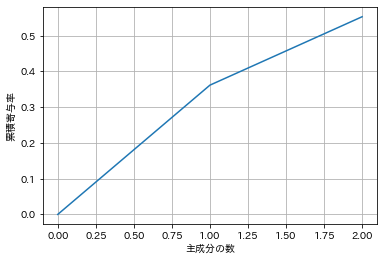

In [38]:
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.plot(np.hstack([0, np.cumsum(pca.explained_variance_ratio_)]))
plt.xlabel("主成分の数")
plt.ylabel("累積寄与率")
plt.grid()
plt.show()

# 【問題13 ロジスティック回帰にて学習】

In [74]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

# 【問題14 ロジスティック回帰にて予測】

X_test_pcaを用いて予測

In [75]:
# pred2 = model.predict(X_test_pca)
# pred2

# 【問題15 正解率の算出】

In [76]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, pred2)